In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1) Transformer

In [2]:
X = np.array(['Chat',
              'Chien',
              'Chat',
              'Oiseau'])

In [4]:
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [5]:
transformer.transform(X)

array([0, 1, 0, 2], dtype=int64)

In [7]:
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

# 2) Encodage

In [8]:
import matplotlib.pyplot as plt

In [9]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [11]:
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [12]:
encoder.classes_

array(['chat', 'chien', 'oiseau'], dtype='<U6')

In [13]:
encoder.transform(y)

array([0, 1, 0, 2], dtype=int64)

In [14]:
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [16]:
encoder.inverse_transform(np.array([0,0,2,2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [17]:
X = np.array([['Chat', 'Poils'],
             ['Chien', 'Poils'],
             ['Chat', 'Poils'],
             ['Oiseau','Plumes']])

Ordinal Encoder

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

One hot encoder

In [22]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
y = np.array(['chat','chien','chat','oiseau'])

In [25]:
encoder = LabelBinarizer(sparse_output=True) #Compress output data
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# 3) Normalisation 

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
X = np.array([[70],
             [80],
             [120]])

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [34]:
from sklearn.datasets import load_iris

No handles with labels found to put in legend.


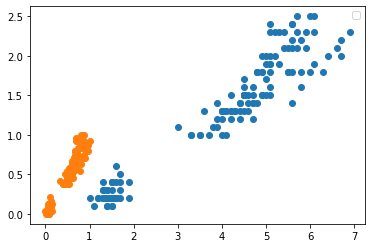

In [49]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3])
plt.scatter(X_minmax[:,2], X_minmax[:,3])
plt.legend()
plt.show()

# 4) Standardisation

In [38]:
from sklearn.preprocessing import StandardScaler

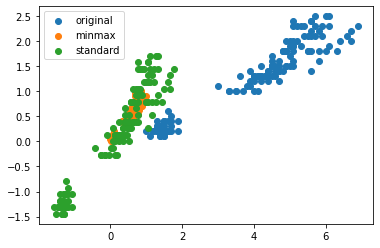

In [50]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3], label = 'original')
plt.scatter(X_minmax[:,2], X_minmax[:,3], label = 'minmax')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], label = 'standard')
plt.legend()
plt.show()

Attention aux données abbérantes !!!

Évitez d'utiliser MinMaxScaler et StandardScaler en présence des outliers !!

# 5) RobustScaler

In [45]:
from sklearn.preprocessing import RobustScaler

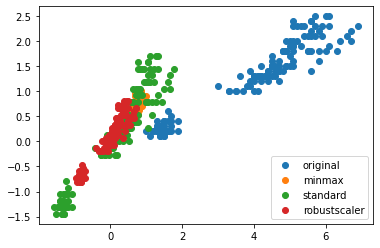

In [52]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3], label = 'original')
plt.scatter(X_minmax[:,2], X_minmax[:,3], label = 'minmax')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], label = 'standard')
plt.scatter(X_robust[:,2], X_robust[:,3], label = 'robustscaler')
plt.legend()
plt.show()

Utiliser RobustScaler en presence des outliers !

# 6) PolynomialFeatures

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
X = np.array([[1],
             [2],
             [0.5]])

In [55]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

In [57]:
from sklearn.linear_model import LinearRegression

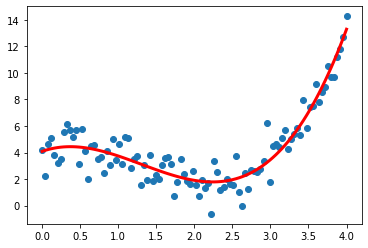

In [64]:
X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)

plt.scatter(X, y)

X_poly = PolynomialFeatures(degree=3).fit_transform(X)


model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, c='r', lw=3)

In [65]:
from sklearn.preprocessing import PowerTransformer

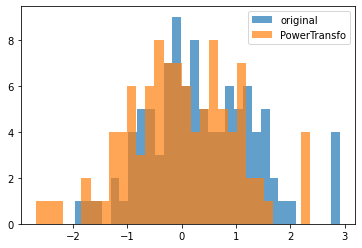

In [66]:
#PowerTransformer
np.random.seed(0)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

X2 = PowerTransformer().fit_transform(X)

plt.hist(X[:,0], bins=30, alpha=0.7, label='original')
plt.hist(X2[:,0], bins=30, alpha=0.7, label='PowerTransfo')
plt.legend()
plt.show()

In [67]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [68]:
X = np.linspace(0, 5, 10).reshape((10, 1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [69]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [70]:
np.hstack((X, KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()))

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.55555556, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.11111111, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.66666667, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [2.22222222, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [2.77777778, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [3.33333333, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [3.88888889, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [4.44444444, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [5.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1. 

In [71]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# 7) Pipeline

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

In [77]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=0))

model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [80]:
params = {
    'polynomialfeatures__degree': [2, 3, 4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [81]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [82]:
grid.score(X_test, y_test)

0.9736842105263158

In [83]:
#Si on compare avec sans pre-processing
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8421052631578947